In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import spacy
import matplotlib.pyplot as plt
from spacy.lang.en.stop_words import STOP_WORDS

In [82]:
data=pd.read_csv("spam_ham_dataset.csv")
data

,Unnamed: 0,label,text,label_num
0,605,ham,"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes .",0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\nbobby",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\nabasements darer prudently fortuitous undergone\nlighthearted charm orinoco taster\nrailroad affluent pornographic cuvier\nirvin parkhouse blameworthy chlorophyll\nrobed diagrammatic fogarty clears bayda\ninconveniencing managing represented smartness hashish\nacademies shareholders unload badness\ndanielson pure caffein\nspaniard chargeable levin\n",1
4,2030,ham,"Subject: re : indian springs\nthis deal is to book the teco pvr revenue . it is my understanding that teco\njust sends us a check , i haven ' t received an answer as to whether there is a\npredermined price associated with this deal or if teco just lets us know what\nwe are giving . i can continue to chase this deal down if you need .",0
...,...,...,...,...
5166,1518,ham,"Subject: put the 10 on the ft\nthe transport volumes decreased from 25000 to 10000 . all 10000 should be on\ncontract 012 - 41991 - 203 .\nthanks ,\nami\n

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [84]:
data["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [85]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes .",0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\nbobby",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\nabasements darer prudently fortuitous undergone\nlighthearted charm orinoco taster\nrailroad affluent pornographic cuvier\nirvin parkhouse blameworthy chlorophyll\nrobed diagrammatic fogarty clears bayda\ninconveniencing managing represented smartness hashish\nacademies shareholders unload badness\ndanielson pure caffein\nspaniard chargeable levin\n",1
4,2030,ham,"Subject: re : indian springs\nthis deal is to book the teco pvr revenue . it is my understanding that teco\njust sends us a check , i haven ' t received an answer as to whether there is a\npredermined price associated with this deal or if teco just lets us know what\nwe are giving . i can continue to chase this deal down if you need .",0


In [46]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [47]:
data=data.drop(['Unnamed: 0','label',],axis=1)


In [48]:
data.rename(columns={"label_num":"label"},inplace=True)

In [49]:
data

,text,label
0,"Subject: enron methanol ; meter # : 988291\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\nflow data provided by daren } .\nplease override pop ' s daily volume { presently zero } to reflect daily\nactivity you can obtain from gas control .\nthis change is needed asap for economics purposes .",0
1,"Subject: hpl nom for january 9 , 2001\n( see attached file : hplnol 09 . xls )\n- hplnol 09 . xls",0
2,"Subject: neon retreat\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\nbobby",0
3,"Subject: photoshop , windows , office . cheap . main trending\nabasements darer prudently fortuitous undergone\nlighthearted charm orinoco taster\nrailroad affluent pornographic cuvier\nirvin parkhouse blameworthy chlorophyll\nrobed diagrammatic fogarty clears bayda\ninconveniencing managing represented smartness hashish\nacademies shareholders unload badness\ndanielson pure caffein\nspaniard chargeable levin\n",1
4,"Subject: re : indian springs\nthis deal is to book the teco pvr revenue . it is my understanding that teco\njust sends us a check , i haven ' t received an answer as to whether there is a\npredermined price associated with this deal or if teco just lets us know what\nwe are giving . i can continue to chase this deal down if you need .",0
...,...,...
5166,"Subject: put the 10 on the ft\nthe transport volumes decreased from 25000 to 10000 . all 10000 should be on\ncontract 012 - 41991 - 203 .\nthanks ,\nami\n- - - - - - - - - - - - - - - - - - - - - - forwarded by ami chokshi / corp / enron

In [51]:
data["label"].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

Data Preprocessing :

In [52]:
data.duplicated().sum()

np.int64(178)

In [53]:
nlp = spacy.load("en_core_web_sm")

In [12]:
## Remove stop words, punctuation, digits, and convert to lowercase

In [54]:

data["text"]=data["text"].apply(lambda x : ' '.join([token.text for token in nlp(x) if not token.is_stop  and not token.is_punct and not token.like_num]))

In [55]:
data.to_csv('data_cleaned.csv', index=False)

In [56]:
cleaned=pd.read_csv("data_cleaned.csv")
cleaned


,text,label
0,Subject enron methanol meter \n follow note gave monday preliminary \n flow data provided daren \n override pop s daily volume presently reflect daily \n activity obtain gas control \n change needed asap economics purposes,0
1,Subject hpl nom january \n attached file hplnol xls \n hplnol xls,0
2,Subject neon retreat \n ho ho ho wonderful time year neon leaders retreat time \n know time year extremely hectic s tough think past holidays life past week december january s d like think minute \n calender handed beginning fall semester retreat scheduled weekend january youth ministers conference brad dustin connected week going change date following weekend january comes need think \n think agree s important time recharge batteries far spring semester lot trouble difficult away kids etc brad came potential alternative weekend let know prefer \n option retreat similar ve past years year heartland country inn www com outside brenham s nice place d bedroom bedroom house s country real relaxing close brenham hour minutes golf shop antique craft stores brenham eat dinner ranch spend time d meet saturday return sunday morning like ve past \n option stay houston dinner nice restaurant dessert time visiting recharging homes saturday evening easier trade wouldn t time ll let decide \n email preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote doesn t way complaining allowed like tend \n great weekend great golf great fishing great shopping makes happy \n bobby,0
3,Subject photoshop windows office cheap main trending \n abasements darer prudently fortuitous undergone \n lighthearted charm orinoco taster \n railroad affluent pornographic cuvier \n irvin parkhouse blameworthy chlorophyll \n robed diagrammatic fogarty clears bayda \n inconveniencing managing represented smartness hashish \n academies shareholders unload badness \n danielson pure caffein \n spaniard chargeable levin \n,1
4,Subject indian springs \n deal book teco pvr revenue understanding teco \n sends check haven t received answer \n predermined price associated deal teco lets know \n giving continue chase deal need,0
...,...,...
5166,Subject ft \n transport volumes decreased \n contract \n thanks \n ami \n forwarded ami chokshi corp enron \n \n royal b edmondson reliantenergy com \n ami chokshi enron com \n cc \n subject ft \n attached file hpl sept xls \n hpl sept xls,0
5167,Subject following noms \n hpl t extra mmcf d weekend ll try week \n nom stay mmcf d redeliveries \n \n \n pg e fcv carthage \n forwarded bruce mcmills ftworth pefs pec \n \n \n bruce mcmills \n \n dfarmer enron com briley enron com stacey neuweiler enron com \n cc chad w cass gcs cec pec pec william e speckels gcs cec pec pec donna \n c spencer gcs cec pec pec michael r cherry easttexas pefs pec pec \n darrel f bane easttexas pefs pec pec \n subject following noms \n nominate mmbtu d eastrans following \n deliver pg e fuel cotton valley continue \n \n mmbtu d sale \n mmbtu d cartwheel agreement carthage,0
5168,Subject calpine daily gas nomination \n > \n > \n julie mention earlier hope start unit afternoon \n experiencing difficulties informed thanks \n ricky archer \n fuel supply \n louisiana suite \n houston texas \n direct \n fax \n calpine daily gas nomination doc \n calpine daily gas nomination doc,0
5169,Subject industrial worksheets august activity \n attached worksheets august activity \n different worksheets supply market \n market worksheet preliminary continuously updated \n month \n supply worksheets capture buybacks relevant pricing data \n worksheets found separate files o \n logistics robert lloyd buydeaug xls supply \n o logistics ken \n sorry delay providing ll data,0


In [57]:
# Nettoyer les caractères indésirables (retours chariot, sauts de ligne, etc.)
cleaned['text'] = cleaned['text'].apply(lambda x: x.replace('\r', ' ').replace('\n', ' ').strip())

In [58]:
# Désactiver la troncature des colonnes dans l'affichage
pd.set_option('display.max_colwidth', None)

# Afficher la première ligne de la colonne 'text' après nettoyage
print(cleaned["text"].head(1).to_string(index=False))

Subject enron methanol meter   follow note gave monday preliminary   flow data provided daren   override pop s daily volume presently reflect daily   activity obtain gas control   change needed asap economics purposes


In [59]:
cleaned.to_csv('data_cleaned2.csv', index=False)

Stemming and lemmatization

1-Lemmatization: Extracting the lemma for each token

In [86]:
cleaned2=pd.read_csv("data_cleaned2.csv")

In [64]:
#réduit les mots à leur forme de base
cleaned2["text"]=cleaned["text"].apply(lambda x : ' '.join([token.lemma_ for token in nlp(x)]))

In [87]:
cleaned2.shape

(5171, 2)

In [88]:
cleaned2.columns

Index(['text', 'label'], dtype='object')

In [89]:
cleaned2

,text,label
0,Subject enron methanol meter follow note gave monday preliminary flow data provided daren override pop s daily volume presently reflect daily activity obtain gas control change needed asap economics purposes,0
1,Subject hpl nom january attached file hplnol xls hplnol xls,0
2,Subject neon retreat ho ho ho wonderful time year neon leaders retreat time know time year extremely hectic s tough think past holidays life past week december january s d like think minute calender handed beginning fall semester retreat scheduled weekend january youth ministers conference brad dustin connected week going change date following weekend january comes need think think agree s important time recharge batteries far spring semester lot trouble difficult away kids etc brad came potential alternative weekend let know prefer option retreat similar ve past years year heartland country inn www com outside brenham s nice place d bedroom bedroom house s country real relaxing close brenham hour minutes golf shop antique craft stores brenham eat dinner ranch spend time d meet saturday return sunday morning like ve past option stay houston dinner nice restaurant dessert time visiting recharging homes saturday evening easier trade wouldn t time ll let decide email preference course available weekend democratic process prevail majority vote rule let hear soon possible preferably end weekend vote doesn t way complaining allowed like tend great weekend great golf great fishing great shopping makes happy bobby,0
3,Subject photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin,1
4,Subject indian springs deal book teco pvr revenue understanding teco sends check haven t received answer predermined price associated deal teco lets know giving continue chase deal need,0
...,...,...
5166,Subject ft transport volumes decreased contract thanks ami forwarded ami chokshi corp enron royal b edmondson reliantenergy com ami chokshi enron com cc subject ft attached file hpl sept xls hpl sept xls,0
5167,Subject following noms hpl t extra mmcf d weekend ll try week nom stay mmcf d redeliveries pg e fcv carthage forwarded bruce mcmills ftworth pefs pec bruce mcmills dfarmer enron com briley enron com stacey neuweiler enron com cc chad w cass gcs cec pec pec william e speckels gcs cec pec pec donna c spencer gcs cec pec pec michael r cherry easttexas pefs pec pec darrel f bane easttexas pefs pec pec subject following noms nominate mmbtu d eastrans following deliver pg e fuel cotton valley continue mmbtu d sale mmbtu d cartwheel agreement carthage,0
5168,Subject calpine daily gas nomination > > julie mention earlier hope start unit afternoon experiencing difficulties informed thanks ricky archer fuel supply louisiana suite houston texas direct fax calpine daily gas nomination doc calpine daily gas nomination doc,0
5169,Subject industrial worksheets august activity attached worksheets august activity different worksheets supply market market worksheet preliminary continuously updated month supply worksheets capture buybacks relevant pricing data worksheets found separate files o logistics robert lloyd buydeaug xls supply o logistics ken sorry delay providing ll data,0


In [90]:
cleaned2["label"].value_counts()

label
0    3672
1    1499
Name: count, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [92]:
X = cleaned2['text'].values
y = cleaned2['label'].values

# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Paramètres pour la tokenisation
vocab_size = 10000  # taille du vocabulaire
max_length = 100    # longueur maximale des séquences
embedding_dim = 100 # dimension des embeddings

# Tokenisation du texte
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding des séquences pour avoir une longueur uniforme
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [94]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Utiliser une sigmoid pour une sortie binaire
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\hp\Desktop\EmailSpamDetector\.nlpenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
history = model.fit(X_train_padded, y_train, epochs=20, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8174 - loss: 0.4822 - val_accuracy: 0.8454 - val_loss: 0.4302
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.8393 - loss: 0.4323 - val_accuracy: 0.8841 - val_loss: 0.3629
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8917 - loss: 0.3523 - val_accuracy: 0.8995 - val_loss: 0.3206
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9262 - loss: 0.2594 - val_accuracy: 0.8783 - val_loss: 0.3723
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8664 - loss: 0.3918 - val_accuracy: 0.8783 - val_loss: 0.3633
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.8646 - loss: 0.3838 - val_accuracy: 0.8928 - val_loss: 0.3220
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.9042 - loss: 0.2961 - val_accuracy: 0.9314 - val_loss: 0.2153
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9528 - loss: 0.1829 - val_accuracy: 0.

In [97]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9686 - loss: 0.1182
Accuracy: 96.43%


In [98]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

prediction = (model.predict(X_test_padded) > 0.5).astype("int32")


accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)


f1_scores = f1_score(y_test, prediction, average=None)
print("F1 Score pour chaque classe:", f1_scores)

print("\nRapport de classification:\n", classification_report(y_test, prediction, target_names=["Not Spam", "Spam"]))


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
Accuracy: 0.9642512077294686
F1 Score pour chaque classe: [0.97488119 0.93802345]

Rapport de classification:
               precision    recall  f1-score   support

    Not Spam       0.98      0.97      0.97       742
        Spam       0.92      0.96      0.94       293

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035



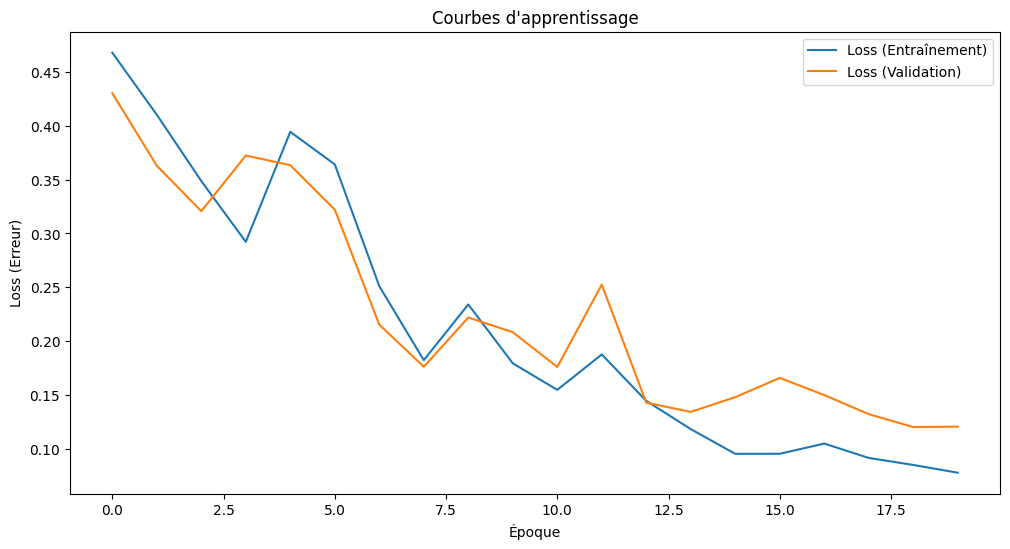

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss (Entraînement)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title("Courbes d'apprentissage")
plt.xlabel('Époque')
plt.ylabel('Loss (Erreur)')
plt.legend()
plt.show()

Réduction de la perte (loss) : On voit une diminution régulière de la perte d'entraînement et de validation au fil des époques, ce qui indique que le modèle apprend à mieux minimiser l'erreur.

Absence de surapprentissage :

Les courbes de perte d'entraînement et de validation diminuent de manière similaire, sans que la courbe de validation commence à augmenter ou à stagner alors que la courbe d'entraînement continue de baisser.
Ceci indique que le modèle ne présente pas de surapprentissage évident, car la performance sur les données de validation reste stable et suit la tendance de la courbe d'entraînement.
Convergence : Vers la fin des époques, les courbes tendent à se stabiliser autour de valeurs basses (environ 0.10 à 0.15). Cela peut indiquer que le modèle est proche de sa convergence, c’est-à-dire qu’il a atteint un point où il apprend peu de nouvelles informations supplémentaires à chaque époque.